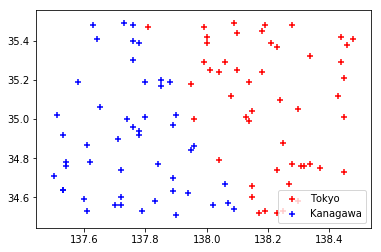

In [3]:
# cat neuron_data_display.py
# codeing: UTF-8

import math
import matplotlib.pyplot as plt


# シグモイド関数
def sigmoid(a):
    return 1.0 / (1.0 + math.exp(-a))


# ニューロン
class Neuron:
    input_sum = 0.0
    output = 0.0

    def setInput(self, inp):
        self.input_sum += inp

    def getOutput(self):
        self.output = sigmoid(self.input_sum)
        return self.output
    
    def reset(self):
        self.input_sum = 0
        self.output = 0


# ニューラルネットワーク
class NeuralNetwork:

    # 入力の重み
    w_im = [[0.496, 0.512], [-0.501, 0.998], [0.498, -0.502]]
    w_mo = [0.121, -0.4996, 0.200]
    
    # 各層の宣言
    input_layer = [0.0, 0.0, 1.0]
    middle_layer = [Neuron(), Neuron(), 1.0]
    output_layer = Neuron() 
    
    # 実行
    def commit(self, input_data):
        # 各層のリセット
        self.input_layer[0] = input_data[0]
        self.input_layer[1] = input_data[1]
        
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        
        self.output_layer.reset()
        
        
        # 入力層→中間層
        self.middle_layer[0].setInput(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].setInput(self.input_layer[1] * self.w_im[1][0])
        self.middle_layer[0].setInput(self.input_layer[2] * self.w_im[2][0])
        
        
        self.middle_layer[1].setInput(self.input_layer[0] * self.w_im[0][1])
        self.middle_layer[1].setInput(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].setInput(self.input_layer[2] * self.w_im[2][1])

        
        # 中間層→出力層
        self.output_layer.setInput(self.middle_layer[0].getOutput() * self.w_mo[0])
        self.output_layer.setInput(self.middle_layer[1].getOutput() * self.w_mo[1])
        self.output_layer.setInput(self.middle_layer[2] * self.w_mo[2])
        
        return self.output_layer.getOutput()

# 基本点(データの範囲は0, 0-1, 0の範囲に納めるため)
refer_point_0 = 34.5
refer_point_1 = 137.5


trial_data = []
trial_data_file = open('trial_data', "r")
for line in trial_data_file:
    line = line.rstrip().split(",")
    trial_data.append([float(line[0]) - refer_point_0, float(line[1]) - refer_point_1])
trial_data_file.close()



# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

# 実行
position_tokyo = ([],[])
position_kanagawa = ([],[])
for data in trial_data:
    if neural_network.commit(data) < 0.5:
        position_tokyo[0].append(data[1] + refer_point_1)
        position_tokyo[1].append(data[0] + refer_point_0)
    else:
        position_kanagawa[0].append(data[1] + refer_point_1)
        position_kanagawa[1].append(data[0] + refer_point_0)

        


plt.scatter(position_tokyo[0], position_tokyo[1], c="red", label="Tokyo", marker="+")
plt.scatter(position_kanagawa[0], position_kanagawa[1], c="blue", label="Kanagawa", marker="+")

plt.legend()
plt.show()

